# Exploratory Data Analysis

#### Ryan Bales (@ryanbales)<br>ryan@balesofdata.com

***

### Import Packages

In [115]:
import pandas as pd

### Setup Matplotlib for Jupyter Notebooks

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 10

### Load Training Dataset

In [117]:
df_train = pd.read_csv("data/train.csv")

In [118]:
print(df_train.shape)
df_train.head()

(9473, 3)


fname         label  manually_verified
0  00044347.wav        Hi-hat                  0
1  001ca53d.wav     Saxophone                  1
2  002d256b.wav       Trumpet                  0
3  0033e230.wav  Glockenspiel                  1
4  00353774.wav         Cello                  1

### How much Data do we have?

In [119]:
print("Training Examples Count = {}".format(df_train.shape[0]))

Training Examples Count = 9473


In [120]:
print("Number of categories(labels) = {}".format(len(df_train.label.unique())))

Number of categories(labels) = 41


In [121]:
df_train.label.unique()

array(['Hi-hat', 'Saxophone', 'Trumpet', 'Glockenspiel', 'Cello', 'Knock',
       'Gunshot_or_gunfire', 'Clarinet', 'Computer_keyboard',
       'Keys_jangling', 'Snare_drum', 'Writing', 'Laughter', 'Tearing',
       'Fart', 'Oboe', 'Flute', 'Cough', 'Telephone', 'Bark', 'Chime',
       'Bass_drum', 'Bus', 'Squeak', 'Scissors', 'Harmonica', 'Gong',
       'Microwave_oven', 'Burping_or_eructation', 'Double_bass',
       'Shatter', 'Fireworks', 'Tambourine', 'Cowbell', 'Electric_piano',
       'Meow', 'Drawer_open_or_close', 'Applause', 'Acoustic_guitar',
       'Violin_or_fiddle', 'Finger_snapping'], dtype=object)

### Review Distribution of Data by Category (Label)

In [123]:
group_by_category = df_train.groupby(["label", "manually_verified"]).count()
group_by_category

fname
label                 manually_verified       
Acoustic_guitar       0                    195
                      1                    105
Applause              0                    239
                      1                     61
Bark                  0                    172
                      1                     67
Bass_drum             0                    233
                      1                     67
Burping_or_eructation 0                    135
                      1                     75
Bus                   0                     50
                      1                     59
Cello                 0                    175
                      1                    125
Chime                 0                     49
                      1                     66
Clarinet              0                    170
                      1                    130
Computer_keyboard     0                     59
                      1                     60
Cough                 0                    174
                      1                     69
Cowbell               0                     95
                      1                     96
Double_bass           0                    208
                      1                     92
Drawer_open_or_close  0                     91
                      1                     67
Electric_piano        0                     76
                      1                     74
...                                        ...
Laughter              0                    212
                      1                     88
Meow                  0                     86
                      1                     69
Microwave_oven        0                     79
                      1                     67
Oboe                  0                    200
                      1                     99
Saxophone             0                     44
                      1                    256
Scissors              0                     36
                      1                     59
Shatter               0                    233
                      1                     67
Snare_drum            0                    230
                      1                     70
Squeak                0                    231
                      1                     69
Tambourine            0                    129
                      1                     92
Tearing               0                    238
                      1                     62
Telephone             0                      8
                      1                    112
Trumpet               0                    214
                      1                     86
Violin_or_fiddle      0                     50
                      1                    250
Writing               0                    203
                      1                     67

[82 rows x 1 columns]

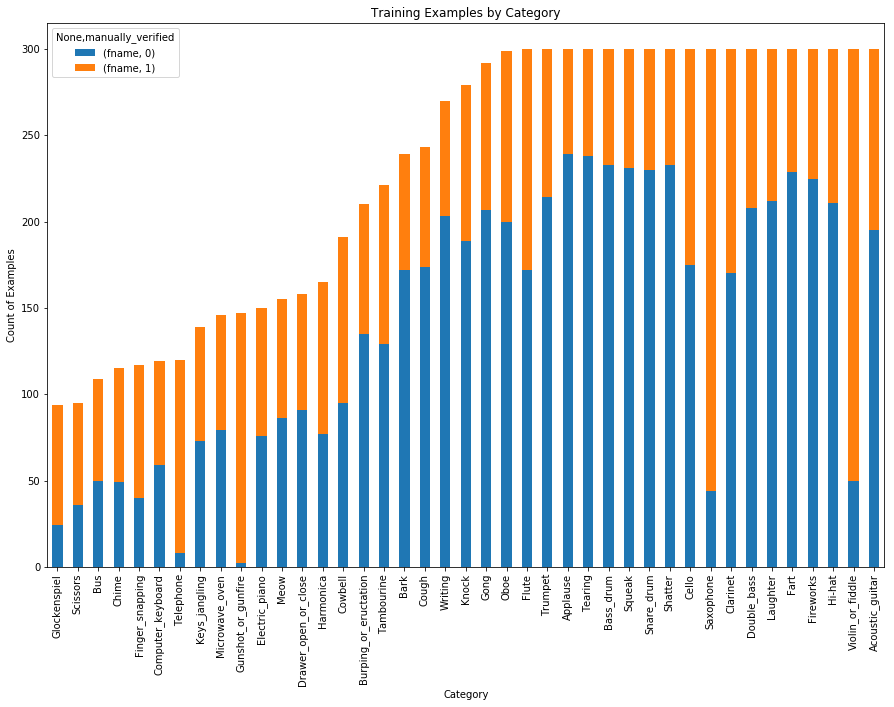

In [128]:
bar_plot = group_by_category.unstack().reindex(group_by_category.unstack()
                                               .sum(axis=1).sort_values().index).plot(kind="bar", 
                                                                                      stacked=True, 
                                                                                      title = "Training Examples by Category")
bar_plot.set_xlabel("Category")
bar_plot.set_ylabel("Count of Examples");

### What if we only use Manually Verified Audio Files

In [129]:
df_train_verified = df_train.loc[df_train['manually_verified'] == 1]

In [130]:
print(df_train_verified.shape)
df_train_verified.head()

(3710, 3)


fname               label  manually_verified
1  001ca53d.wav           Saxophone                  1
3  0033e230.wav        Glockenspiel                  1
4  00353774.wav               Cello                  1
6  003da8e5.wav               Knock                  1
7  0048fd00.wav  Gunshot_or_gunfire                  1